<a href="https://colab.research.google.com/github/Thchieu/ML_2023/blob/main/29__TranHaiChieu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mô tả dataset**
Dataset **Soccer_Football Clubs Ranking** có chứa thông tin về xếp hạng các câu lạc bộ bóng đá (football/soccer clubs) trên thế giới trong năm 2020. Tập dữ liệu này được thu thập từ nhiều nguồn khác nhau trên internet và được tổng hợp lại thành một bảng dữ liệu.

Bảng dữ liệu bao gồm các thuộc tính như sau:
1. Ranking: xếp hạng của câu lạc bộ trong năm 2020.
2. Club name: tên của câu lạc bộ bóng đá.
3. Country: quốc gia của câu lạc bộ bóng đá.
4. Point score: số điểm của câu lạc bộ bóng đá.
5. 1 Year change: thay đổi trong 1 năm qua của câu lạc bộ bóng đá.
6. Previous point scored: số điểm của câu lạc bộ bóng đá trong năm trước đó.
7. Symbol change: biểu tượng (ký hiệu) của câu lạc bộ bóng đá.




# **Một số vấn đề của dataset**
Dữ liệu của dataset này có một số vấn đề nhất định, bao gồm:

1. Thiếu dữ liệu: Dataset này chỉ chứa thông tin về bảng xếp hạng của các câu lạc bộ bóng đá, thiếu thông tin về các trận đấu, cầu thủ, huấn luyện viên và các chỉ số thống kê khác.

2. Không đại diện: Dataset này chỉ bao gồm các câu lạc bộ bóng đá từ một số quốc gia, không phản ánh được sự đa dạng của bóng đá trên toàn thế giới.

3. Không cập nhật: Dataset này chỉ cung cấp thông tin bảng xếp hạng của các câu lạc bộ tại thời điểm nhất định, không thể đại diện cho tình trạng hiện tại của bóng đá.

4. Không chính xác: Dữ liệu bảng xếp hạng của các câu lạc bộ có thể bị sai lệch do nhiều yếu tố khác nhau, ví dụ như việc không tính toán chính xác các kết quả thi đấu, hoặc do sự can thiệp của các bên liên quan.

In [1]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

from keras import Sequential
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
from keras.layers import Dense
import tensorflow
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.svm import SVC

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


# **Biểu đồ phân bố của một số thuộc tính trong tập dữ liệu**

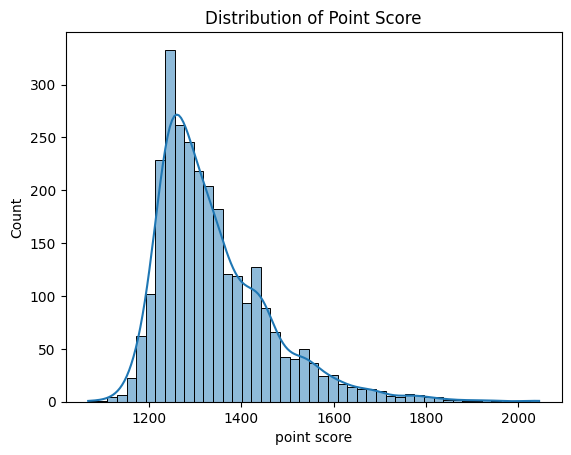

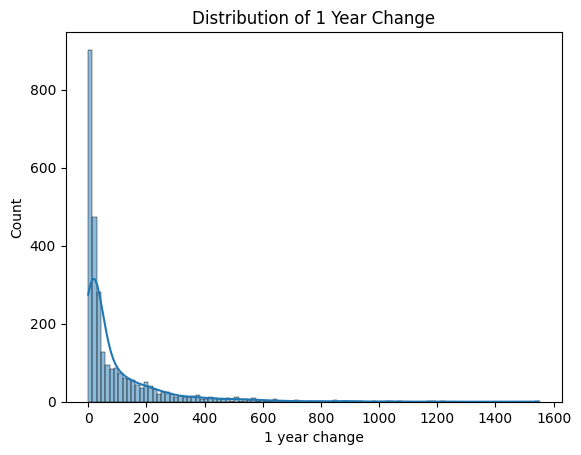

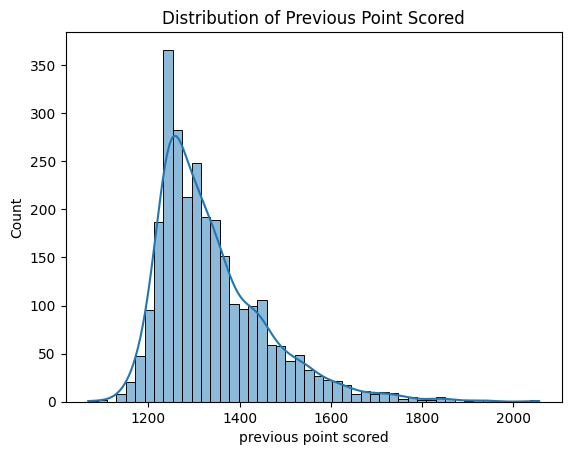

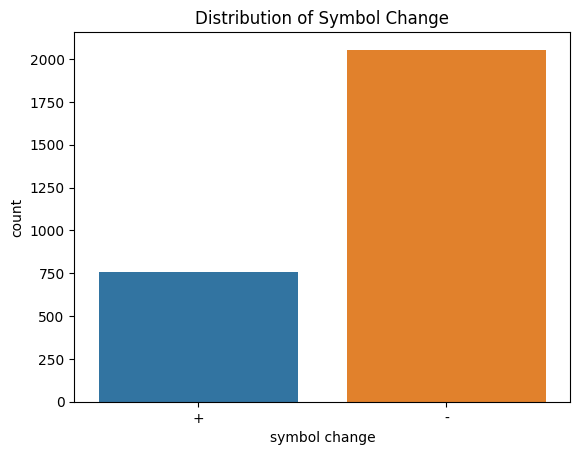

In [4]:
# Đọc dữ liệu
data = pd.read_csv("Soccer_Football-Clubs-Ranking.csv")

# Biểu đồ phân bố của point score
sns.histplot(data=data, x="point score", kde=True)
plt.title("Distribution of Point Score")
plt.show()

# Biểu đồ phân bố của 1 year change
sns.histplot(data=data, x="1 year change", kde=True)
plt.title("Distribution of 1 Year Change")
plt.show()

# Biểu đồ phân bố của previous point scored
sns.histplot(data=data, x="previous point scored", kde=True)
plt.title("Distribution of Previous Point Scored")
plt.show()

# Biểu đồ phân bố của symbol change
sns.countplot(data=data, x="symbol change")
plt.title("Distribution of Symbol Change")
plt.show()



Dựa vào 4 biểu đồ trên, ta có thể rút ra một số nhận xét như sau:

1. Phân bố của điểm số (point score) phân phối điểm số của các câu lạc bộ bóng đá khá đa dạng, có xu hướng tập trung ở khoảng giữa và chênh lệch lớn giữa giá trị nhỏ nhất và lớn nhất
2. Phân bố của sự thay đổi điểm số trong 1 năm (1 year change) trung tâm ở vị trí 0. Điều này cho thấy rằng các câu lạc bộ có xu hướng có sự thay đổi điểm số khá nhỏ giữa các năm.
3. Phân bố của điểm số trước đó (previous point scored) nó khá tương đồng với biểu đồ điểm số hiện tại.
4. Biểu đồ đếm của sự thay đổi ký hiệu (symbol change) cho thấy rằng hầu hết các câu lạc bộ đều có xu hướng bị giảm điêm.

# **Áp dụng các thuật toán**

In [7]:
# Đọc dữ liệu
data = pd.read_csv("Soccer_Football-Clubs-Ranking.csv")

# Tiền xử lý dữ liệu
le = LabelEncoder()
data['club name'] = le.fit_transform(data['club name'])
data['country'] = le.fit_transform(data['country'])
data['symbol change'] = le.fit_transform(data['symbol change'])

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tách các tính năng và biến mục tiêu cho dữ liệu đào tạo
X_train = train_data.drop(['ranking'], axis=1)
y_train = train_data['ranking']

X_test = test_data.drop(['ranking'], axis=1)
y_test = test_data['ranking']

# KNN
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_pre = precision_score(y_test, knn_pred, average='weighted', zero_division=1)
knn_rec = recall_score(y_test, knn_pred, average='weighted', zero_division=1)
knn_f1 = f1_score(y_test, knn_pred, average='weighted')

#SVM
  #Linear Kernel
svm = SVC(kernel='linear').fit(X_train, y_train)
linear_pred = svm.predict(X_test)
linear_acc = accuracy_score(y_test, linear_pred)
linear_pre = precision_score(y_test, linear_pred, average='weighted', zero_division=1)
linear_rec = recall_score(y_test, linear_pred, average='weighted', zero_division=1)
linear_f1 = f1_score(y_test, linear_pred, average='weighted')

  #Polynomial Kernel
svm = SVC(kernel='poly', degree = 5).fit(X_train, y_train)
poly_pred = svm.predict(X_test)
poly_acc = accuracy_score(y_test, poly_pred)
poly_pre = precision_score(y_test, poly_pred, average='weighted', zero_division=1)
poly_rec = recall_score(y_test, poly_pred, average='weighted', zero_division=1)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')

# Naive Bayes
nb = GaussianNB().fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)
nb_pre = precision_score(y_test, nb_pred, average='weighted', zero_division=1)
nb_rec = recall_score(y_test, nb_pred, average='weighted', zero_division=1)
nb_f1 = f1_score(y_test, nb_pred, average='weighted')

# Random Forest classifier
rf = RandomForestClassifier().fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_pre = precision_score(y_test, rf_pred, average='weighted', zero_division=1)
rf_rec = recall_score(y_test, rf_pred, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')

# Decision Tree classifier
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
dtc_pre = precision_score(y_test, dtc_pred, average='weighted', zero_division=1)
dtc_rec = recall_score(y_test, dtc_pred, average='weighted', zero_division=1)
dtc_f1 = f1_score(y_test, dtc_pred, average='weighted')

In [8]:
# Xử lý dữ liệu
data = data.dropna() # loại bỏ các dòng chứa giá trị null
le = LabelEncoder()

data['club name'] = le.fit_transform(data['club name'])
data['country'] = le.fit_transform(data['country'])
data['symbol change'] = le.fit_transform(data['symbol change'])
X = data.drop('ranking', axis=1).values
y = data['ranking'].values

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Định nghĩa và huấn luyện mạng neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(X_train, y_train, epochs=25, batch_size=64, verbose=1)

# Dự đoán kết quả trên tập kiểm tra
y_pred = model.predict(X_test)

# Chuyển đổi các giá trị dự đoán thành các nhãn
y_pred_labels = np.round(y_pred).astype(int)
y_test_labels = np.round(y_test).astype(int)

# Tính và in ra các metrics
nn_acc = accuracy_score(y_test_labels, y_pred_labels)
nn_pre = precision_score(y_test_labels, y_pred_labels, average='weighted', zero_division=1)
nn_rec = recall_score(y_test_labels, y_pred_labels, average='weighted',  zero_division=1)
nn_f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

Epoch 1/25
36/36 [==============================] - 1s 4ms/step - loss: 2520555.0000
Epoch 2/25
36/36 [==============================] - 0s 3ms/step - loss: 2502856.0000
Epoch 3/25
36/36 [==============================] - 0s 3ms/step - loss: 2454196.2500
Epoch 4/25
36/36 [==============================] - 0s 3ms/step - loss: 2346135.7500
Epoch 5/25
36/36 [==============================] - 0s 3ms/step - loss: 2150303.0000
Epoch 6/25
36/36 [==============================] - 0s 3ms/step - loss: 1845488.5000
Epoch 7/25
36/36 [==============================] - 0s 3ms/step - loss: 1449754.0000
Epoch 8/25
36/36 [==============================] - 0s 3ms/step - loss: 1015521.5000
Epoch 9/25
36/36 [==============================] - 0s 3ms/step - loss: 623398.6875
Epoch 10/25
36/36 [==============================] - 0s 3ms/step - loss: 340370.6250
Epoch 11/25
36/36 [==============================] - 0s 3ms/step - loss: 183697.4219
Epoch 12/25
36/36 [==============================] - 0s 3ms/step -

# **Mô hình Neural Network**

Accuracy: 0.0017761989342806395
Precision: 0.8410301953818827
Recall: 0.0017761989342806395
F1 Score: 0.0011841326228537595


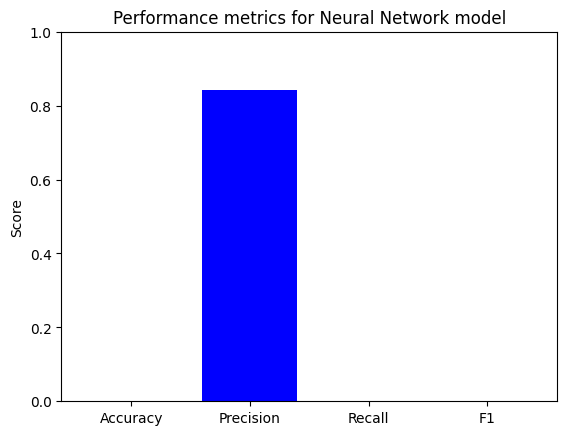

In [9]:
print('Accuracy:', nn_acc)
print('Precision:', nn_pre)
print('Recall:', nn_rec)
print('F1 Score:', nn_f1)

# create a bar chart showing the performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [nn_acc, nn_pre, nn_rec, nn_f1]

plt.bar(labels, values, color=['blue'])

# add labels to the chart
plt.title('Performance metrics for Neural Network model')

plt.ylabel('Score')
plt.ylim([0, 1])

# display the chart
plt.show()

# **Mô hình KNN**

Accuracy: 0.015985790408525755
Precision: 0.9943753700414447
Recall: 0.015985790408525755
F1 Score: 0.013321492007104795


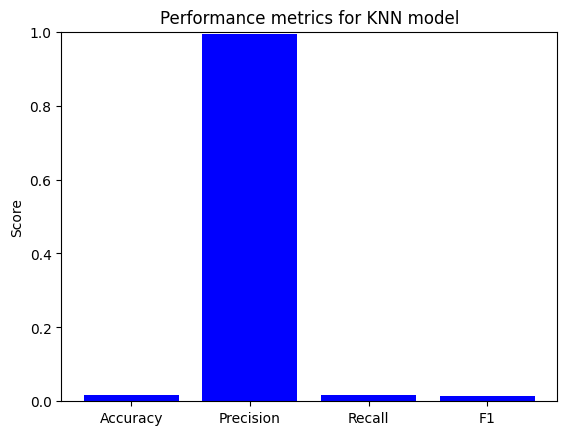

In [10]:
print('Accuracy:', knn_acc)
print('Precision:', knn_pre)
print('Recall:', knn_rec)
print('F1 Score:', knn_f1)

# create a bar chart showing the performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [knn_acc, knn_pre, knn_rec, knn_f1]

plt.bar(labels, values, color=['blue'])

# add labels to the chart
plt.title('Performance metrics for KNN model')

plt.ylabel('Score')
plt.ylim([0, 1])

# display the chart
plt.show()

# **Mô hình SVM dùng Linear**

Accuracy: 0.02664298401420959
Precision: 0.997927767910006
Recall: 0.02664298401420959
F1 Score: 0.02516281823564239


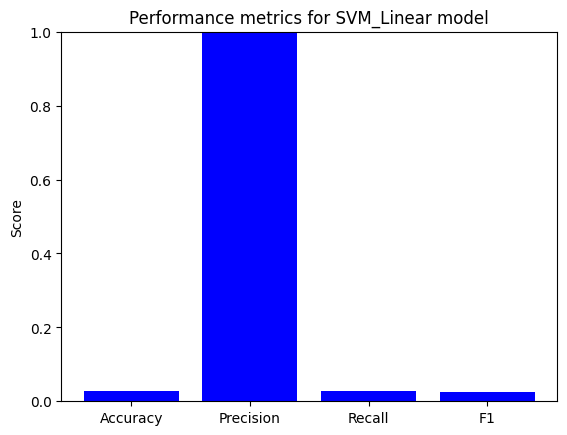

In [11]:
print('Accuracy:', linear_acc)
print('Precision:', linear_pre)
print('Recall:', linear_rec)
print('F1 Score:', linear_f1)

# create a bar chart showing the performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [linear_acc, linear_pre, linear_rec, linear_f1]

plt.bar(labels, values, color=['blue'])

# add labels to the chart
plt.title('Performance metrics for SVM_Linear model')

plt.ylabel('Score')
plt.ylim([0, 1])

# display the chart
plt.show()

# **Mô hình SVM dùng Polynomial**

Accuracy: 0.0053285968028419185
Precision: 1.0
Recall: 0.0053285968028419185
F1 Score: 0.0053285968028419185


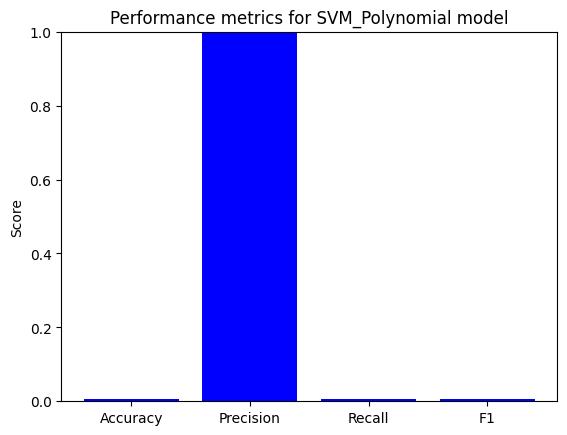

In [12]:
print('Accuracy:', poly_acc)
print('Precision:', poly_pre)
print('Recall:', poly_rec)
print('F1 Score:', poly_f1)

# create a bar chart showing the performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [poly_acc, poly_pre, poly_rec, poly_f1]

plt.bar(labels, values, color=['blue'])

# add labels to the chart
plt.title('Performance metrics for SVM_Polynomial model')

plt.ylabel('Score')
plt.ylim([0, 1])

# display the chart
plt.show()

# **Mô hình Naive Bayes**

Accuracy: 0.02664298401420959
Precision: 0.997927767910006
Recall: 0.02664298401420959
F1 Score: 0.02516281823564239


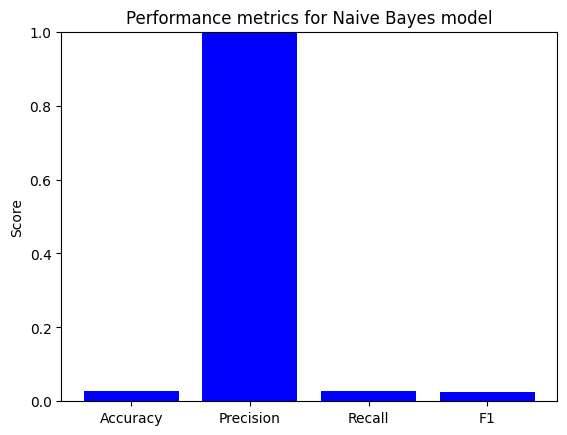

In [13]:
print('Accuracy:', nb_acc)
print('Precision:', nb_pre)
print('Recall:', nb_rec)
print('F1 Score:', nb_f1)

# create a bar chart showing the performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [nb_acc, nb_pre, nb_rec, nb_f1]

plt.bar(labels, values, color=['blue'])

# add labels to the chart
plt.title('Performance metrics for Naive Bayes model')

plt.ylabel('Score')
plt.ylim([0, 1])

# display the chart
plt.show()

# **Mô hình Random Forest**

Accuracy: 0.02664298401420959
Precision: 0.9991119005328597
Recall: 0.02664298401420959
F1 Score: 0.02605091770278271


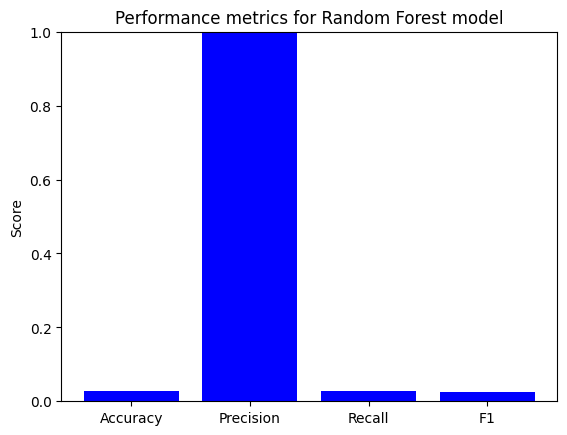

In [14]:
print('Accuracy:', rf_acc)
print('Precision:', rf_pre)
print('Recall:', rf_rec)
print('F1 Score:', rf_f1)

# create a bar chart showing the performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [rf_acc, rf_pre, rf_rec, rf_f1]

plt.bar(labels, values, color=['blue'])

# add labels to the chart
plt.title('Performance metrics for Random Forest model')

plt.ylabel('Score')
plt.ylim([0, 1])

# display the chart
plt.show()

# **Mô hình Decision Tree**

Accuracy: 0.02664298401420959
Precision: 0.9976317347542925
Recall: 0.02664298401420959
F1 Score: 0.02486678507992895


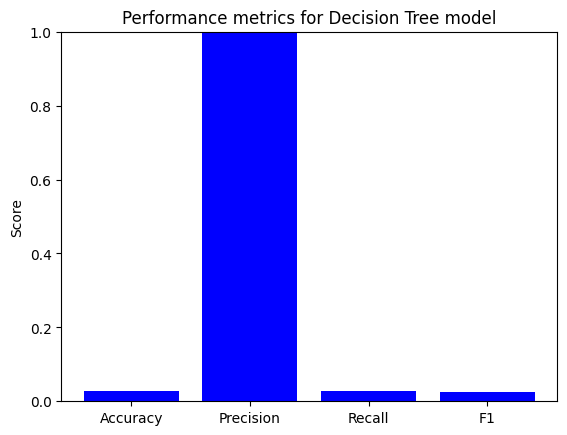

In [15]:
print('Accuracy:', dtc_acc)
print('Precision:', dtc_pre)
print('Recall:', dtc_rec)
print('F1 Score:', dtc_f1)

# create a bar chart showing the performance metrics
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
values = [dtc_acc, dtc_pre, dtc_rec, dtc_f1]

plt.bar(labels, values, color=['blue'])

# add labels to the chart
plt.title('Performance metrics for Decision Tree model')

plt.ylabel('Score')
plt.ylim([0, 1])

# display the chart
plt.show()

# **Biểu đồ so sánh 4 hệ số: Accuracy (Độ chính xác tổng quát), Precision (Độ chính xác), Recall (Độ nhạy), F1 cho các thuật toán**

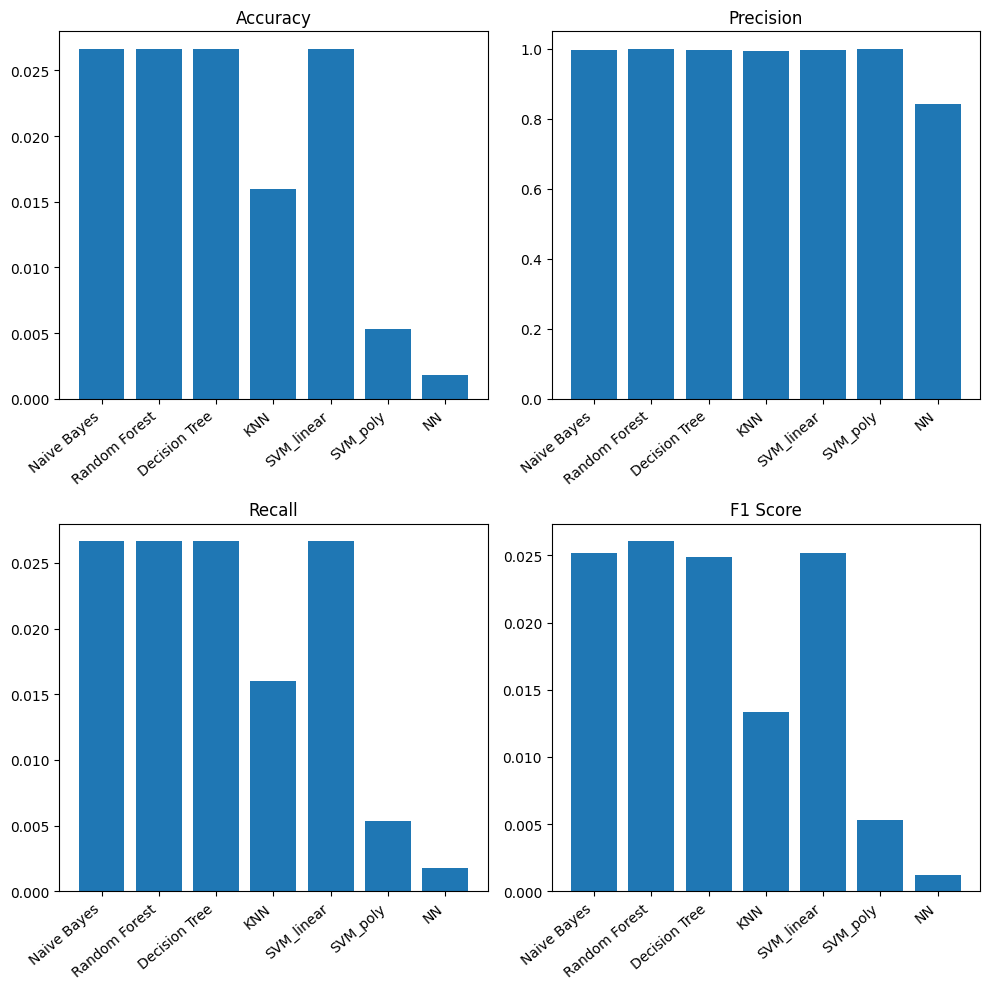

In [16]:
# Đặt tên các mô hình
models = ['Naive Bayes', 'Random Forest', 'Decision Tree', 'KNN', 'SVM_linear', 'SVM_poly', 'NN']

# Tạo danh sách chứa các hệ số đánh giá tương ứng của từng mô hình
accuracy = [nb_acc, rf_acc, dtc_acc, knn_acc, linear_acc, poly_acc, nn_acc]
precision = [nb_pre, rf_pre, dtc_pre, knn_pre, linear_pre, poly_pre, nn_pre]
recall = [nb_rec, rf_rec, dtc_rec, knn_rec, linear_rec, poly_rec, nn_rec]
f1_score = [nb_f1, rf_f1, dtc_f1, knn_f1, linear_f1, poly_f1, nn_f1]

# Vẽ biểu đồ
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

axs[0, 0].bar(models, accuracy)
axs[0, 0].set_title('Accuracy')

axs[0, 1].bar(models, precision)
axs[0, 1].set_title('Precision')

axs[1, 0].bar(models, recall)
axs[1, 0].set_title('Recall')

axs[1, 1].bar(models, f1_score)
axs[1, 1].set_title('F1 Score')

# Xoay tên các mô hình
plt.setp(axs[0, 0].get_xticklabels(), rotation=40, ha='right')
plt.setp(axs[0, 1].get_xticklabels(), rotation=40, ha='right')
plt.setp(axs[1, 0].get_xticklabels(), rotation=40, ha='right')
plt.setp(axs[1, 1].get_xticklabels(), rotation=40, ha='right')

plt.tight_layout()
plt.show()

# **Kết quả**

Dựa vào biểu đồ trên, chúng ta có thể so sánh hiệu quả của 7 mô hình (Nerual Network, KNN, SVM_Linear, SVM_ poly, Naive Bayes, Random Forest, Decision Tree) dựa trên các hệ số đánh giá khác nhau (Accuracy, Precision, Recall, F1 Score).
Cụ thể:
1. Accuracy: Mô hình Random Forest, Naive Bayes và Decision Tree, SVM_Linear cho kết quả khá tương đồng nhau ,KNN có kết quả tương đối, còn SVM_ poly, Nerual Network khá thấp.
2. Precision: KNN, SVM_Linear, SVM_ poly, Naive Bayes, Random Forest, Decision Tree cho kết quả khá tương đồng chỉ có Nerual Network thấp hơn đôi chút.
3. Recall: Mô hình Random Forest, Naive Bayes và Decision Tree, SVM_Linear cho kết quả khá tương đồng nhau , Nerual Network, KNN có kết quả tương đối còn SVM_ poly khá thấp.
4. F1 Score:  Mô hình Random Forest, Naive Bayes và Decision Tree, SVM_Linear cho kết quả khá tương đồng nhau , KNN có kết quả tương đối, còn SVM_ poly, Nerual Network khá thấp.
5. Nhìn chung, mô hình Random Forest cho kết quả tốt nhất trên các hệ số đánh giá được chọn. Tuy nhiên, để đưa ra quyết định chính xác hơn về việc chọn mô hình phù hợp, cần phải xem xét kỹ hơn về các yếu tố khác như độ phức tạp tính toán, độ tin cậy của mô hình, số lượng dữ liệu đầu vào và độ đa dạng của dữ liệu.
